<a href="https://colab.research.google.com/github/vinalyan/diff/blob/master/GeekBrains/algorithms/web3/Lession3_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Настройки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [4]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])
#X_st

In [5]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

## Задание №1
Дана функция:

```
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err
```

Измените ее так, чтобы нули по возможности не попадали в `np.log.


In [6]:
def calc_logloss(y, y_pred):
 #-----------Вот тут все яростно начала менять
  y_pred.dtype = 'float' #делаем float, это если передали int, без этого у меня все ломалось
  for i in range(y_pred.size):
    if y_pred[i] == 0: y_pred[i] += 1e-12 # увеличиваем 0
    if y_pred[i] == 1: y_pred[i] -= 1e-12 # уменьшаем 1
 #--------------Закончил тут---------------
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
  return err

### Проверка

In [7]:
# Пример применения
y1 = np.array([0, 0, 1, 1])
y_pred1 = np.array([0, 0, 1, 1])
calc_logloss(y1, y_pred1)

372.2200359606911

## Задание №2
Подберите аргументы функции `eval_model` для логистической регрессии таким образом, чтобы `log loss` был минимальным.




In [73]:
'''
Для возможности перебора немногоп подправил оригинальную функцию:
1. добавил аргумент log, что бы лишнее в консоль не печаталось
2. добавил возвращения ошибки.
'''
def eval_model(X, y, iterations, eta=1e-4, log = False):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    error_list = np.zeros(iterations)
 
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        error_list[i] = err
 
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0 and log == True:
            print(i, W, err)
    return W, err, error_list 

Я начал увеличивать шаг обучения и с каждым увеличением величина ошибки уменьшалась. 

Дойдя до значения 43 я получил следующее:

In [76]:
W, err, err_list = eval_model(X_st, y, iterations=100, eta=43, log = True)
print(f'{W} , {err}')

0 [-15.81692176 -62.52593187  -0.52966946 -22.82125969] 1.1785958344356262
10 [-16.21852227 -70.82420336  22.52166573  37.13434584] 10.844170893131377
20 [-22.74861485 -75.2843981   41.25089132  92.87414383] 11.052417295157841
30 [-43.31135003 -94.90991969  55.71214313 116.24862224] 10.007655955556704
40 [ -56.2745726  -106.88315766   62.01162585  147.27538428] 9.74425756543967
50 [-67.80832189 -66.56375681  62.31908064 165.85125096] 6.061428703803298
60 [-91.0837189  -94.13189459  39.60675879 142.57414663] 9.653688420939044
70 [-97.80121907 -47.5078655   37.35298593 167.77733098] 5.312635231370138
80 [-109.83774783  -42.31857807   17.80883028  164.36817793] 4.195525170841562
90 [-132.65261191  -87.06396207   11.33114908  161.13078357] 10.839293628566182
[-136.82430958  -39.63381199    4.3592653   174.15961879] , 4.9335794283202565


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Не знаю,что это за ошибка `/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp` но решил больше шаг обучения выше 42 не поднимать.

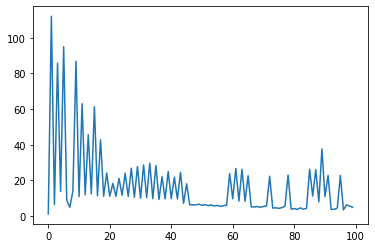

In [77]:
plt.plot(err_list)

Миленко, даже видна сходимость.
Дальше пробую только итерации


In [78]:
W, err, err_list = eval_model(X_st, y, iterations=1000, eta=42, log = True)
print(f'{W} , {err}')

0 [-15.43753488 -61.07505588  -0.50228904 -22.25511343] 1.1785958344356262
100 [-145.23972174  -89.66939915    1.3347783   154.64848933] 7.155983402482875
200 [-228.54258713  -34.01727577  -46.8865921   218.51461031] 1.0061783759126954
300 [-254.90120395  -33.44419342  -58.89371356  227.61490646] 0.009629101208102588
400 [-255.64725607  -33.55572363  -60.45785134  226.86885435] 0.008769226786393015
500 [-256.21808887  -33.83558672  -61.83932145  226.29802155] 0.00813901597866202
600 [-256.70735474  -34.16222726  -63.10641401  225.80875568] 0.007616368103170175
700 [-257.14585713  -34.50076272  -64.28597577  225.3702533 ] 0.007165585438961663
800 [-257.54798854  -34.83776275  -65.39320931  224.9681219 ] 0.006769154373950373
900 [-257.92185435  -35.16744394  -66.43835996  224.59425622] 0.0064162465646364795
[-258.26919299  -35.48413787  -67.41936454  224.24692024] , 0.006102331354744664


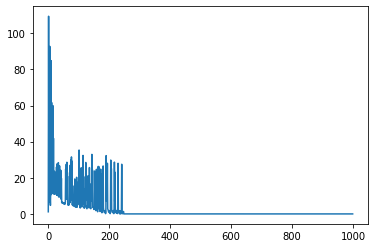

In [79]:
plt.plot(err_list)

In [80]:
W, err1, err_list = eval_model(X_st, y, iterations=80000, eta=42, log = True)
print(f'{W} , {err1}')

0 [-15.43753488 -61.07505588  -0.50228904 -22.25511343] 1.1785958344356262
8000 [-277.1281587   -25.38454845  -80.21830008  219.82556541] 0.003215539869465098
16000 [-289.31958282  -19.86244732  -86.17945887  220.35044134] 0.0024135209723537944
24000 [-296.50405327  -20.31071564  -88.35747316  225.73728951] 0.002158553086036731
32000 [-302.96933704  -20.71431287  -90.31728894  230.58528025] 0.0019521072391086366
40000 [-308.84596145  -21.08120291  -92.09862818  234.99194558] 0.0017815664368636783
48000 [-314.23186767  -21.41748697  -93.73119147  239.03070088] 0.0016383325952318774
56000 [-319.20247004  -21.72786425  -95.23784691  242.75807836] 0.0015163461083322124
64000 [-323.81706547  -22.01603053  -96.6365745   246.21852999] 0.001411214385743527
72000 [-328.12311624  -22.28494458  -97.94176518  249.44763715] 0.001319676051017665
[-332.15871088  -22.53698115  -99.16496738  252.47395462] , 0.0012392686008307543


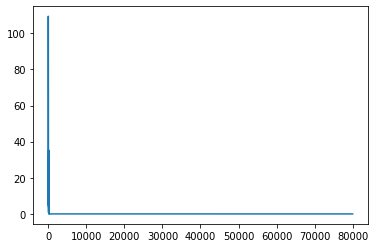

In [81]:
plt.plot(err_list)

Видно, что ошибка продолжает стремиться к 0

In [85]:
W,err1, err_list = eval_model(X_st, y, iterations=550000, eta=42, log = True)
print(f'{W} , {err1}')

0 [-15.43753488 -61.07505588  -0.50228904 -22.25511343] 1.1785958344356262
55000 [-318.60170179  -21.69034956  -95.05574715  242.30756925] 0.0015305951872766513
110000 [-345.3749021   -23.36245357 -103.1707689   262.38501225] 0.0010086037246125883
165000 [-364.2224187   -24.53982266 -108.8832592   276.51944088] 0.0007517774843862235
220000 [-378.77582671  -25.44905355 -113.29415097  287.43377827] 0.0005990867131859774
275000 [-390.63157188  -26.18980098 -116.88737696  296.32511094] 0.0004979007898562723
330000 [-400.63428734  -26.81480239 -119.91896001  303.82680885] 0.00042593189377466284
385000 [-409.28527645  -27.35536338 -122.54084911  310.31479747] 0.0003721271607262518
440000 [-416.90652456  -27.83159376 -124.85063844  316.03053712] 0.0003303830793228837
495000 [-423.71716048  -28.25718057 -126.91474512  321.13835722] 0.00029705456517439
[-429.87296259  -28.64185454 -128.7803844   325.7550807 ] , 0.00026983107823810686


In [86]:
W,err1, err_list = eval_model(X_st, y, iterations=5550000, eta=42, log = True)
print(f'{W} , {err1}')

0 [-15.43753488 -61.07505588  -0.50228904 -22.25511343] 1.1785958344356262
555000 [-430.40444952  -28.67506726 -128.94146191  326.1536854 ] 0.0002676009673576453
1110000 [-472.09114969  -31.28018659 -141.57533148  357.41810801] 0.000139553287189345
1665000 [-497.13130517  -32.84509067 -149.16411199  376.19801206] 9.437737980766933e-05
2220000 [-515.08563491  -33.96718231 -154.60541075  389.66365077] 7.129454844303694e-05
2775000 [-529.09191596  -34.84254212 -158.85019219  400.16829565] 5.7283064066111235e-05
3330000 [-540.57713467  -35.5603463  -162.3309292   408.78216543] 4.787391706363708e-05
3885000 [-550.31182262  -36.16874851 -165.28114366  416.08314963] 4.111949649004064e-05
4440000 [-558.75965732  -36.6967263  -167.84136008  422.41900176] 3.6035228846867986e-05
4995000 [-566.22145845  -37.16307961 -170.10274621  428.01533397] 3.206983338424257e-05
[-572.90351009  -37.58070041 -172.12781934  433.02685776] , 2.8890600950768108e-05


В этот момент потерял интерес к выкручиванию итераций и постороению графиков, судя по графикам ошибка бесконечно стермится к нулу и минимальной быть не минимума у нее как-то нет.

## Задание №3. 
Создайте функцию `calc_pred_proba`, возвращающую предсказанную вероятность класса 1 (на вход подаются `W`, который уже посчитан функцией `eval_model` и `X`, на выходе - массив `y_pred_proba`).


Вероятность решил считать по формуле:

$$p_{+} = \sigma(\left \langle w,x_{i} \right \rangle) $$


In [112]:
def calc_pred(W, X):
  m = X.shape[0]
  y_pred_proba = np.zeros(m)
  y_pred_proba = np.squeeze(sigmoid(np.dot(X, W)))
  return y_pred_proba

In [113]:
p = calc_pred(W, X_st)
for i in range(p.size):
  p[i] = round(p[i],4)
  print(p[i])

0.0001
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.9999
1.0


## Задание №4
Создайте функцию `calc_pred`, возвращающую предсказанный класс (на вход подаются `W`, который уже посчитан функцией `eval_model` и `X`, на выходе - массив `y_pred`).

In [114]:
def calc_pred(W, X, G = 0.5):
    
    m = X.shape[0]
    
    y_predicted = np.zeros(m)

    A = np.squeeze(sigmoid(np.dot(X, W)))

    # За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[0]):
        if (A[i] > G): 
            y_predicted[i] = 1
        elif (A[i] <= G):
            y_predicted[i] = 0

    return y_predicted

In [115]:
y_pred_proba = calc_pred(W, X_st, 0.5)

In [116]:
for i in range(p.size):
  p[i] = round(p[i],4)
  print(f'p: {round(p[i], 3)}| a(x): {y_pred_proba[i]}| y: {y[i]}' )

p: 0.0| a(x): 0.0| y: 0.0
p: 0.0| a(x): 0.0| y: 0.0
p: 1.0| a(x): 1.0| y: 1.0
p: 0.0| a(x): 0.0| y: 0.0
p: 1.0| a(x): 1.0| y: 1.0
p: 0.0| a(x): 0.0| y: 0.0
p: 1.0| a(x): 1.0| y: 1.0
p: 0.0| a(x): 0.0| y: 0.0
p: 1.0| a(x): 1.0| y: 1.0
p: 1.0| a(x): 1.0| y: 1.0


Вроде работает все работает. Но слишком идеально легло. Или ошибка в расчетах или переобучение.

## Задание №5 
Реализуйте функции для подсчета `Accuracy`, матрицы ошибок, точности и полноты, а также F1 score.

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}]$$

$$precision(a, X) = \frac{TP}{TP+FP}$$


$$recall(a, X) = \frac{TP}{TP+FN}$$


In [117]:
#Рассчитываем accuracy
def calc_acuracy(y_pred_proba, y):
  accuracy = 0
  for i in range(y.size):
    if y_pred_proba[i] == y[i]: accuracy = accuracy + 1
  accuracy = accuracy / y.size
  return accuracy

In [118]:
print(f' accuracy = {calc_acuracy(y_pred_proba, y)}')

 accuracy = 1.0


|  <empty>   | $$y = 1$$ | $$y = 0$$ |
--- | --- | ---
| __$$a_{1}(x) = 1$$__  |   $TP$    |   $FP$   |
| __$$a_{1}(x) = 0$$__ |   $FN$   |   $TN$  |

In [119]:
def calc_error_matrix(y_pred_proba, y):
  TP = 0
  FP = 0
  FN = 0 
  TN = 0
  for i in range(y.size):
    if y_pred_proba[i] == 1 and y[i] == 1: TP = TP + 1
    if y_pred_proba[i] == 1 and y[i] == 0: FP = FP + 1
    if y_pred_proba[i] == 0 and y[i] == 1: FN = FN + 1
    if y_pred_proba[i] == 0 and y[i] == 0: TN = TN + 1
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  f_1 = 2 * precision * recall / (precision + recall) 
  return np.array([[TP, FP],[FN,TN]]), precision, recall, f_1

$$F_{1} = 2 \cdot\frac{precision \cdot recall}{ precision + recall}$$


In [122]:
err_mtx, precision, recall, f_1 =  calc_error_matrix(y_pred_proba, y)

In [123]:
print(f'precision = {precision}')
print(f'recall = {recall}')
print(f'F1 = {f_1}')
print(f'матрица ошибок: \n{err_mtx}')


precision = 1.0
recall = 1.0
F1 = 1.0
матрица ошибок: 
[[5 0]
 [0 5]]


## Задание №6
Могла ли модель переобучиться? Почему?

Уверен, что тут переобучение. Если очень долгко крутить небольшую выборку, то можно подобрать под нее идеальную модель. Похоже, что у меня тут что-то такое и есть.